In [1]:
# <import your dependencies here>\from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# Edit this section

* Load_data:
    * load data from csv using `\t` as the separator.
    * Drop irrelevant columns
    * Label encode
    * select the main features and make an array of values (an array of arrays)
        * Example format of this:
            * `x = data_main[['Education', 'Kidhome', 'Teenhome' ......
                   'Z_CostContact', 'Z_Revenue']].values`
    * Scalarization of the features
    * return `scaled_x` variable which is a variable containing the scaled values of x

* apply_pca:
    * return `x_pca` variable which is the set of reduced features.
    * for ideal results, use n_components as 2. Feel free to experiment with this value but n_components = 2 is ideal case.

* find_optimal_clusters:
    * this is to find the optimal number of clusters using the elbow method.
    * find the values of inertia till max_clusters+1 and append the inertia values to an array.
    * return the inertia array with `inertia` variable. `VERY IMPORTANT TO SEE THE GRAPH`

* perform_kmeans_clustering:
    * use kmeans `init = "k-means++"`, `max_iter=300`, `n_init = 10`, `random_state` is your choice and `n_clusters` is the best elbow value.
    * return the kmeans fit predict values with `y_kmeans` variable.

* perform_agglomerative_clustering:
    * Linkage method is "ward" and n_clusters is the best elbow value.
    * return the agglomerative clustering values after fit predicting the `x` feature values as `y_agglomerative` variable name.

* for dendrogram:
    * get_linkages:
        * it helps to form the linkages between x and in the 'ward' method.
        * return `linked` variable which has the linkages.
    * plot_dendrogram:
        * it is to plot the dendrogram in the (10,7) with x_label as index and y_label as distance
        * dendrogram function takes in the linkages from `get_linkages` function as the `linked` variable.

* Now, you are requested to submit screenshots of the `dengrogram, test case 1 and 2 passed messages`.

In [2]:
# Load Data and Preprocess

def load_data(filepath):
    data = pd.read_csv(filepath, sep='\t')
    
    data = data.drop(columns=['ID', 'Dt_Customer'], axis=1, errors='ignore')
    
    data=data.dropna()
    
    
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    
    
    feat = ['Education', 'Kidhome', 'Teenhome', 'Income', 
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']
    x = data[feat].values
    

    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(x)
    
    return scaled_x
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA and plot Explained Variance

def apply_pca(x, n_components=None, variance_threshold=0.85):
    
 
    pca = PCA()
    pca.fit(x)

    
    exp_variance = pca.explained_variance_ratio_

   
    cum_exp_variance = np.cumsum(exp_variance)

    # Plot 
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    # Plot indi
    ax[0].bar(range(1, len(exp_variance) + 1), exp_variance, alpha=0.7, color='b')
    ax[0].set_xlabel('Principal Component #')
    ax[0].set_ylabel('Explained Variance Ratio')
    ax[0].set_title('Explained Variance by Principal Component')

    # Plot cumula
    ax[1].plot(cum_exp_variance, marker='o')
    ax[1].axhline(y=0.85, color='r', linestyle='--', label='85% threshold')
    ax[1].set_xlabel('Number of Components')
    ax[1].set_ylabel('Cumulative Explained Variance')
    ax[1].set_title('Cumulative Explained Variance by Principal Component')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    # Apply PCA 
    if n_components:
        pca = PCA(n_components=n_components)
        x_pca = pca.fit_transform(x)
    else:
        x_pca = pca.transform(x)

    return x_pca

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    inertia = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(x)
        inertia.append(kmeans.inertia_)
    
    # Plotting 
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    

    # print(f'Optimal number of clusters: {optimal_clusters}')
    return  inertia
    pass


def perform_kmeans_clustering(x, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(x)
    return y_kmeans
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=2):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters,  linkage='average')
    y_agglomerative = agglomerative.fit_predict(x)
    return y_agglomerative
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    linked = linkage(x, method='average')
    return linked
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.grid(True)
    plt.title('Dendrogram')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()
    pass

# Just edit the file path here... Don't edit anything else

In [3]:
def calculate_silhouette_score(x, y_pred):
    return silhouette_score(x, y_pred)

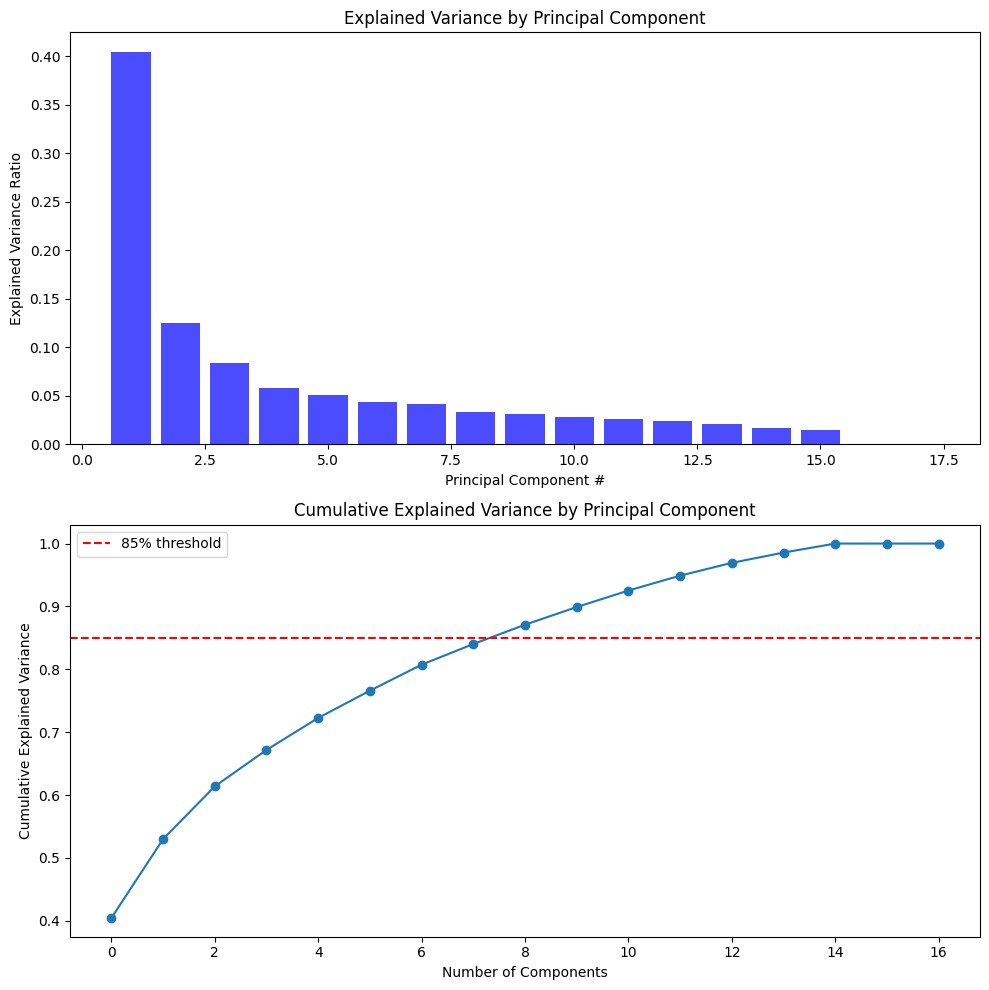

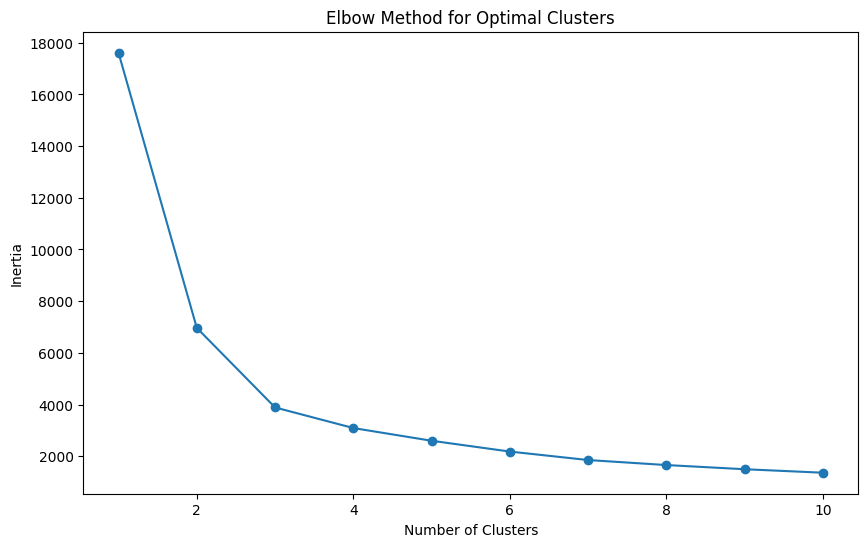

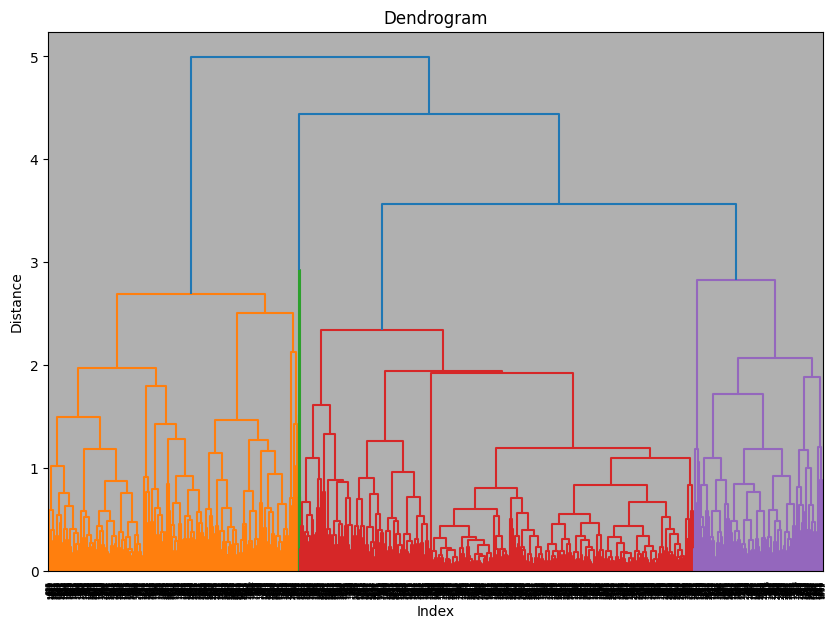

Test Case 1 passed!
Test case 2 passed!


In [4]:
def main(filepath):
    x = load_data(filepath)

    # Apply PCA for Dimensionality Reduction
    x_pca = apply_pca(x, n_components=2)
    
    # KMeans: finding optimal clusters
    inertia = find_optimal_clusters(x_pca)
    
    # KMeans clustering implementation
    y_kmeans = perform_kmeans_clustering(x_pca)
    
    # Agglomerative Clustering
    y_agglomerative = perform_agglomerative_clustering(x_pca)
    
    # Hierarchical Clustering Dendrogram
    hierarchical_linked = get_linkages(x_pca)
    
    # Plot the dendrogram for hierarchical clustering
    plot_dendrogram(hierarchical_linked)
    
    # Silhouette scores
    silhouette_kmeans = calculate_silhouette_score(x_pca, y_kmeans)
    silhouette_agglomerative = calculate_silhouette_score(x_pca, y_agglomerative)
    
    # Return results
    return {
        "inertia": inertia,
        "silhouette_kmeans": silhouette_kmeans,
        "silhouette_agglomerative": silhouette_agglomerative,
        "agglomerative_clustering": y_agglomerative,
        "hierarchical_linked": hierarchical_linked,
        "pca_components": x_pca
    }

# %%
# Call the main function and print silhouette scores and dendrogram
result = main("./marketing_campaign.csv")


# Silhouette scores checks 
if result['silhouette_kmeans'] >= 0.5:
    print("Test Case 1 passed!")
    # print(result['silhouette_kmeans'])
else:
    print("Test Case 1 failed!")
    # print(result['silhouette_kmeans'])
if result['silhouette_agglomerative'] >= 0.5:
    print("Test case 2 passed!")
    # print(result['silhouette_agglomerative'])
else:
    print("Test case 2 failed!")
    # print(result['silhouette_agglomerative'])